<a href="https://www.kaggle.com/code/aabdollahii/semi-supervised-learning-tutorial?scriptVersionId=261465009" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color: #FFFFFF; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.7; color: #000000; padding: 10px;">

<div style="text-align: center; border-bottom: 2px solid #DDDDDD; padding-bottom: 20px; margin-bottom: 25px;">
        <h1 style="color: #000000; font-size: 2.5em; margin-bottom: 0;">A Practical Guide to Semi-Supervised Learning</h1>
        <h2 style="color: #555555; font-size: 1.4em; font-weight: 300;">Predicting Bank Customer Subscriptions</h2>
    </div>

    
<h2 style="color: #000000; font-weight: 600;">Project Goals &amp; Motivation</h2>

<p>Welcome to this hands-on tutorial on <strong>Semi-Supervised Learning (SSL)</strong>! In many real-world machine learning projects, we face a common and critical challenge: a lack of labeled data. While collecting vast amounts of raw data (e.g., user activity logs, transaction records) is often straightforward, the process of manually labeling it is expensive, slow, and frequently requires specialized knowledge.</p>

 <p>This is the exact problem SSL is designed to solve. It builds a bridge between supervised learning (which needs fully labeled data) and unsupervised learning (which uses no labels).</p>

<blockquote style="border-left: 4px solid #CCCCCC; padding-left: 15px; margin-left: 20px; font-style: italic; color: #333333;">
      <strong>The Core Idea:</strong> We will build a powerful prediction model by intelligently using a <em>small</em> amount of labeled data combined with a <em>large</em> pool of unlabeled data.
    </blockquote>

 <p>In this notebook, we will simulate a realistic business scenario. A bank has marketing data for thousands of customers, but only a small subset has confirmed outcomes (i.e., whether they subscribed to a term deposit). Our mission is to leverage all available data—both labeled and unlabeled—to build the best possible prediction model.</p>

<hr style="border: 0; height: 1px; background: #EEEEEE; margin: 30px 0;">

    
<h2 style="color: #000000; font-weight: 600;">Understanding the Dataset</h2>
    <p>We will be working with the <strong>Bank Marketing Dataset</strong> from the UCI Machine Learning Repository, a popular choice for classification tasks.</p>

 <ul>
        <li><b>Kaggle Source:</b> <a href="https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset" target="_blank" style="color: #007BFF; text-decoration: none;">Bank Marketing UCI Dataset</a></li>
        <li><b>Primary Goal:</b> The classification task is to predict if a client will subscribe to a term deposit. This is found in the target column, <code>y</code>.</li>
        <li><b>Data Snapshot:</b> The dataset contains <strong>41,188 records</strong> and <strong>21 features</strong> for each customer.</li>
    </ul>

<h4>A Glimpse at the Features:</h4>
    <p>The dataset includes a rich mix of information:</p>
    <ul>
        <li><b>Personal Details:</b> <code>age</code>, <code>job</code>, <code>marital</code> status, <code>education</code>.</li>
        <li><b>Campaign Context:</b> <code>contact</code> method, <code>month</code> of contact, <code>duration</code> of the last call.</li>
        <li><b>Economic Indicators:</b> <code>emp.var.rate</code> (employment variation rate), <code>cons.price.idx</code> (consumer price index).</li>
    </ul>

<div style="background-color: #F9F9F9; border: 1px solid #DDDDDD; border-left: 5px solid #007BFF; padding: 15px 20px; margin: 20px 0;">
        <h4 style="margin-top: 0; color: #000000;">💡 Simulating the Semi-Supervised Scenario</h4>
        <p style="color: #333333;">This dataset is fully labeled, which is perfect for a controlled experiment. We will engineer a semi-supervised problem by splitting the data as follows:</p>
        <ol style="color: #333333;">
            <li><strong>A Small Labeled Set:</strong> This mimics our "expensive," manually verified data (e.g., just 1,000 samples).</li>
            <li><strong>A Large Unlabeled Set:</strong> The majority of the training data where we will programmatically hide the labels.</li>
            <li><strong>A Hold-Out Test Set:</strong> Used only at the very end to provide an unbiased evaluation of our final models.</li>
        </ol>
    </div>

<hr style="border: 0; height: 1px; background: #EEEEEE; margin: 30px 0;">

<h2 style="color: #000000; font-weight: 600;">Our Game Plan</h2>
    <p>We will follow a clear, step-by-step process:</p>

<ol>
        <li><b>Setup &amp; Preprocessing:</b> We'll start by loading the data, performing an initial exploratory analysis, and preparing our features for modeling (e.g., encoding categorical variables, scaling numerical data).</li>
        <br>
        <li><b>Create the SSL Data Splits:</b> We will carefully partition the data into the labeled, unlabeled, and test sets described above.</li>
        <br>
        <li><b>Model 1: The Supervised Baseline:</b> We will train a classifier using <em>only</em> the small labeled dataset. This model's performance will serve as our crucial benchmark.</li>
        <br>
        <li><b>Model 2: The Semi-Supervised Model (Pseudo-Labeling):</b> This is the core of our tutorial.
            <ul>
                <li>We'll explain and implement <strong>Pseudo-Labeling</strong>, an intuitive and effective SSL technique.</li>
                <li>The process involves training on the labeled data, predicting on the unlabeled data, and adding the most confident predictions back into the training set to retrain the model.</li>
            </ul>
        </li>
        <br>
        <li><b>Evaluation &amp; Conclusion:</b> Finally, we will compare the performance of both models on the hold-out test set. We'll analyze key metrics (like F1-Score and the Precision-Recall curve) to demonstrate the tangible benefits of the semi-supervised approach.</li>
    </ol>

<p>Let's begin this exciting journey and unlock the value hidden in our unlabeled data!</p>

</div>

<div style="background-color: #FFFFFF; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.7; color: #000000; padding: 10px;">

<div style="text-align: center; border-bottom: 2px solid #DDDDDD; padding-bottom: 20px; margin-bottom: 25px;">
        <h1 style="color: #000000; font-size: 2.5em; margin-bottom: 0;">What is Semi-Supervised Learning?</h1>
        <h2 style="color: #555555; font-size: 1.4em; font-weight: 300;">Bridging the Gap Between Labeled and Unlabeled Data</h2>
    </div>

<h2>🧠 The Core Problem: The Data Labeling Bottleneck</h2>
    <p>Before we dive into our specific problem, let's build a solid understanding of Semi-Supervised Learning (SSL). To appreciate why SSL is so valuable, we first need to understand the two most common types of machine learning:</p>

 <div style="display: flex; flex-wrap: wrap; justify-content: space-between; gap: 20px; margin-top: 20px;">
        
 <div style="flex: 1; min-width: 300px; border: 1px solid #DDDDDD; padding: 15px; border-radius: 5px;">
            <h3 style="color: #007BFF; margin-top: 0;">1. Supervised Learning</h3>
            <p>This is the most common form of machine learning. You have a dataset where every single data point is labeled with the correct answer. The algorithm learns by finding patterns that map the input features to the output label.</p>
            <ul>
                <li><b>Analogy:</b> Learning with a complete answer key.</li>
                <li><b>Example:</b> Predicting house prices using a dataset where every house has a known sale price.</li>
                <li><b>Challenge:</b> Requires a fully labeled dataset, which is often expensive and time-consuming to create.</li>
            </ul>
        </div>
        
   <div style="flex: 1; min-width: 300px; border: 1px solid #DDDDDD; padding: 15px; border-radius: 5px;">
            <h3 style="color: #28a745; margin-top: 0;">2. Unsupervised Learning</h3>
            <p>Here, you have a dataset with no labels at all. The goal is not to predict a specific outcome, but to discover hidden structures or patterns within the data itself.</p>
            <ul>
                <li><b>Analogy:</b> Finding groups in a crowd without any prior information about them.</li>
                <li><b>Example:</b> Customer segmentation, where you group customers based on purchasing behavior without any pre-defined group names.</li>
                <li><b>Challenge:</b> Can't be used for prediction tasks that require a specific, known target (like "subscribes" vs. "does not subscribe").</li>
            </ul>
        </div>
    </div>
    
<hr style="border: 0; height: 1px; background: #EEEEEE; margin: 30px 0;">

<h2>💡 Enter Semi-Supervised Learning: The Best of Both Worlds</h2>

<p>Semi-Supervised Learning operates in the realistic middle ground between the two. It is designed for situations where you have:</p>
    <ul>
        <li>A <strong>small amount of labeled data</strong>.</li>
        <li>A <strong>large amount of unlabeled data</strong>.</li>
    </ul>

 <blockquote style="border-left: 4px solid #CCCCCC; padding-left: 15px; margin-left: 20px; font-style: italic; color: #333333;">
      <strong>The Key Assumption:</strong> SSL works under the belief that the unlabeled data, despite lacking explicit labels, contains valuable information about the underlying structure of the data distribution. This structure can help the model generalize better than if it only saw the small labeled set.
    </blockquote>

<p>Think of it like a student learning a new language. The teacher provides a few example sentences with full translations (the labeled data). The student then reads many books in the new language without translations (the unlabeled data). By seeing how words are used in context across many examples, the student's understanding of grammar and vocabulary deepens far more than if they had only studied the initial translated sentences.</p>

<div style="background-color: #F9F9F9; border: 1px solid #DDDDDD; border-left: 5px solid #ffc107; padding: 15px 20px; margin: 20px 0;">
        <h4 style="margin-top: 0; color: #000000;">Why is this relevant to our Bank Marketing problem?</h4>
        <p style="color: #333333;">Imagine the bank has records for 40,000 customers (unlabeled data). Calling each one to confirm if they subscribed is impossible. However, they might have a small, reliable dataset of 1,000 customers whose outcomes are known (labeled data). Instead of discarding the 39,000 unlabeled records, SSL allows us to use them to build a more robust and accurate prediction model.</p>
    </div>

<h2>⚙️ How Does It Work? The Pseudo-Labeling Strategy</h2>

  <p>There are several techniques for SSL, but we will focus on one of the most intuitive and popular methods: <strong>Pseudo-Labeling</strong>.</p>
    <p>Here’s the step-by-step logic, which we will implement in our code shortly:</p>

 <ol>
        <li><strong>Train the Baseline:</strong> First, train a standard supervised model using only the small set of <strong>labeled data</strong>.</li>
        <br>
        <li><strong>Predict on Unlabeled Data:</strong> Use this initial model to make predictions on the large pool of <strong>unlabeled data</strong>.</li>
        <br>
        <li><strong>Generate Pseudo-Labels:</strong> Identify the predictions that the model is most "confident" about. For example, predictions with a probability greater than 95%. These high-confidence predictions are treated as if they were true labels—hence the name "pseudo-labels."</li>
        <br>
        <li><strong>Combine and Retrain:</strong> Add these newly pseudo-labeled data points to your original labeled training set. Now you have a larger, combined training set.</li>
        <br>
        <li><strong>Iterate and Improve:</strong> Retrain your model on this new, larger dataset. The resulting model now benefits from the patterns learned from the unlabeled data and should be more accurate. This process can even be repeated several times.</li>
    </ol>
    
<p>Now that we have a firm grasp of the theory, let's move on to the practical part: loading and inspecting our dataset!</p>

</div>


<div style="background-color: #ADD8E6; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6; color: #000000; padding: 10px;">

<div style="border-bottom: 2px solid #DDDDDD; padding-bottom: 15px; margin-bottom: 20px;">
        <h1 style="color: green; font-size: 2.2em; margin-bottom: 0;"> Data Loading & Initial Exploration</h1>
        <h2 style="color: #555555; font-size: 1.3em; font-weight: 300;">Getting Acquainted with Our Dataset</h2>
    </div>

<p>Theory is one thing, but data science is a hands-on discipline. Before we can build any models, we must first become familiar with our raw material: the Bank Marketing dataset. The upcoming code block is dedicated to this foundational process.</p>
    
<p>Think of this step as an investigator arriving at a new scene. We need to assess the situation, understand the layout, and gather initial facts before we can form any hypotheses.</p>

<div style="background-color: #F9F9F9; border: 1px solid #DDDDDD; padding: 20px; border-radius: 5px; margin: 25px 0;">
        <h3 style="margin-top: 0; color: #0056b3;">Our Objectives in the Next Code Cell:</h3>
        <p>Here is the plan for what we are about to execute in Python:</p>
        <ul style="list-style-type: square; padding-left: 20px; color: #333333;">
            <li>
                <strong>Setup the Environment:</strong> We will import all the necessary Python libraries for data manipulation (Pandas), numerical operations (NumPy), and visualization (Matplotlib, Seaborn).
            </li>
            <br>
            <li>
                <strong>Load the Data:</strong> We will read the <code>bank-additional-full.csv</code> file into a Pandas DataFrame. We'll pay special attention to the file's separator to ensure it loads correctly.
            </li>
            <br>
            <li>
                <strong>Perform an Initial Inspection:</strong> We will conduct a "first-look" analysis to answer several critical questions:
                <ul>
                    <li style="margin-top: 8px;">What do the columns and rows look like? (<code>.head()</code>)</li>
                    <li>Are there any missing values? What are the data types of each column? (<code>.info()</code>)</li>
                    <li>What is the statistical summary of the numerical features? (<code>.describe()</code>)</li>
                </ul>
            </li>
            <br>
            <li>
                <strong>Analyze the Target Variable:</strong> Most importantly, we will investigate our target column, 'y'. We need to understand the balance between clients who subscribed ('yes') and those who did not ('no'). This is a crucial step in any classification task.
            </li>
        </ul>
    </div>

<p>This structured exploration is not just a formality; it dictates our entire modeling strategy. The insights we gather here will inform how we preprocess the data, how we split it for our Semi-Supervised approach, and how we evaluate our final model's performance.</p>
    
<p>Let's dive into the code.</p>

</div>


In [1]:
# --- 1.1: Importing Essential Libraries ---
# We begin by importing the libraries that will be our workhorses for this analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn will be used for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, roc_auc_score
# --- 1.2: Configuring Visualization Styles ---
# A consistent and pleasant visual style makes plots easier to interpret.
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
print("✅ Libraries imported and styles configured successfully.")

# for now, I think I will use these libraries. If I need more, I am gonna add them right in the related cell.

✅ Libraries imported and styles configured successfully.


In [2]:
# --- 2.1: Loading the Dataset ---
# The dataset is stored in a CSV file, but the separator is a semicolon ';' instead of the usual comma.
# We specify this with the `sep=';'` argument.
file_path = '/kaggle/input/bank-marketing-dataset/bank.csv'
try:
    df = pd.read_csv(file_path)
    print(f"✅ Dataset loaded successfully from: {file_path}")
except FileNotFoundError:
    print(f"❌ Error: File not found at {file_path}. Please check the path.")
    # In a real notebook, you might stop execution here or load a sample dataframe
    df = pd.DataFrame() # Create an empty dataframe to avoid further errors

✅ Dataset loaded successfully from: /kaggle/input/bank-marketing-dataset/bank.csv


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
print("\n--- Dataset Information (Data Types & Missing Values) ---")
df.info()


--- Dataset Information (Data Types & Missing Values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
print("\n--- Summary Statistics for Numerical Features ---")
df.describe()


--- Summary Statistics for Numerical Features ---


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


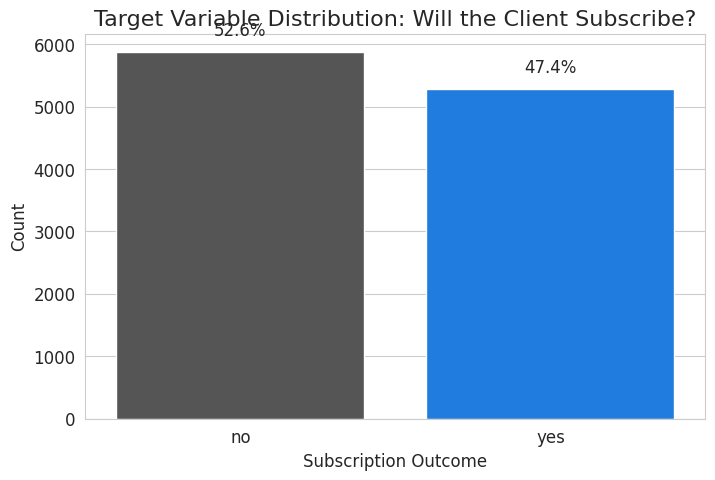

In [6]:
if not df.empty:
    # --- Visualizing the Target Variable Distribution ---
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x='deposit', data=df, palette=['#555555', '#007BFF'], order=['no', 'yes'])
    plt.title('Target Variable Distribution: Will the Client Subscribe?', fontsize=16)
    plt.xlabel('Subscription Outcome', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Adding percentage labels on top of the bars
    total = len(df['deposit'])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 200 # offset for label
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
        
    plt.show()

    
    

<div style="background-color: #C8E5EE;border-radius:5px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6; color: #000000; padding: 10px;">

<div style="text-align: center; border-bottom: 2px solid #DDDDDD; padding-bottom: 20px; margin-bottom: 25px;">
        <h1 style="color: #000000; font-size: 2.2em; margin-bottom: 0;">Interpreting the Initial Results</h1>
        <h2 style="color: #555555; font-size: 1.3em; font-weight: 300;">Key Insights from Our First Look</h2>
    </div>

<p>After running the code, we have our first set of results. Let's break down what each part tells us about the Bank Marketing dataset. This analysis is the foundation upon which we'll build our entire preprocessing and modeling strategy.</p>

 <h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px;">1. Data Structure and Content (`.head()`)</h3>
    <p>The first five rows give us a tangible feel for the data. We can see a mix of personal client information (<code>age</code>, <code>job</code>, <code>marital</code>), financial status (<code>balance</code>), and campaign-specific details (<code>duration</code>, <code>campaign</code>, <code>poutcome</code>). Our target variable is <code>deposit</code>, which indicates whether the client subscribed to the term deposit.</p>

<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px; margin-top: 30px;">2. Data Types and Integrity (`.info()`)</h3>
    <p>The <code>.info()</code> output provides a technical blueprint of our dataset. Here's what we learn:</p>
    <ul style="list-style-type: none; padding-left: 0;">
        <li style="background-color: #F8F9FA; border-left: 4px solid #28a745; padding: 10px 15px; margin-bottom: 10px;">
            <strong>No Missing Values:</strong> Every column shows <code>11162 non-null</code> entries out of a total of 11162 rows. This is excellent news! It means we don't need to perform any missing value imputation (like filling with mean, median, or a constant). Our dataset is clean and complete.
        </li>
        <li style="background-color: #F8F9FA; border-left: 4px solid #ffc107; padding: 10px 15px;">
            <strong>Mix of Data Types:</strong> We have two main data types:
            <ul>
                <li><strong><code>int64</code> (7 columns):</strong> These are our numerical features, like <code>age</code>, <code>balance</code>, and <code>duration</code>. They can be used directly in many machine learning models.</li>
                <li><strong><code>object</code> (10 columns):</strong> These are our categorical features, like <code>job</code>, <code>marital</code>, and <code>education</code>. Machines don't understand text labels, so we will need to encode these columns (e.g., using One-Hot Encoding) before feeding them into a model.</li>
            </ul>
        </li>
    </ul>

<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px; margin-top: 30px;">3. Numerical Feature Summary (`.describe()`)</h3>
    <p>The statistical summary reveals the scale and distribution of our numerical data. This is where we hunt for potential issues like outliers.</p>
    
<div style="background-color: #F1F8FF; border: 1px solid #cce5ff; padding: 20px; border-radius: 5px; margin-top: 20px;">
        <h4 style="margin-top: 0; color: #004085;">Key Insights and My Observations:</h4>
        <ul style="padding-left: 20px; color: #333333;">
            <li>
                <strong>Varying Scales:</strong> The features are on vastly different scales. The <code>mean</code> of <code>age</code> is ~41, while the <code>mean</code> of <code>balance</code> is ~1528. This is a strong signal that we <strong>must perform feature scaling</strong> (e.g., using StandardScaler) to prevent models from being biased towards features with larger magnitudes.
            </li>
            <li style="margin-top: 10px;">
                <strong>Potential Outliers in `balance`:</strong> The <code>balance</code> feature has a minimum value of <code>-6847</code> and a maximum of <code>81204</code>. The standard deviation (<code>3225</code>) is very large compared to the mean (<code>1528</code>). Furthermore, 75% of clients have a balance below <code>1708</code>, yet the max is over <code>81,000</code>. This suggests the presence of significant right-skew and high-value outliers.
            </li>
            <li style="margin-top: 10px;">
                <strong>Interesting `pdays` Feature:</strong> The feature <code>pdays</code> (days since last contact) has a minimum of <code>-1</code>. The 25th, 50th (median), and 75th percentiles are also very low or negative. This value of <code>-1</code> likely has a special meaning, such as "the client was not previously contacted." This is a business rule we must handle correctly during preprocessing.
            </li>
            <li style="margin-top: 10px;">
                <strong>Call Duration (`duration`):</strong> The duration of the last call varies wildly from 2 seconds to over an hour (3881 seconds). This feature is known to be a strong predictor but has a logical flaw: the duration is not known *before* a call is made. Including it can lead to "data leakage." For a realistic model that predicts *who to call*, this feature should be dropped. We will proceed with it for this tutorial to demonstrate handling numerical data, but this is a critical real-world consideration.
            </li>
        </ul>
    </div>
</div>


<div style="background-color: #FEEBE7;border-radius:5px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6; color: #000000; padding: 10px;">

<div style="border-bottom: 2px solid #DDDDDD; padding-bottom: 15px; margin-bottom: 20px;">
        <h1 style="color: #000000; font-size: 2.2em; margin-bottom: 0;">Step 2: Data Preprocessing & SSL Splitting</h1>
        <h2 style="color: #555555; font-size: 1.3em; font-weight: 300;">Preparing the Data for Machine Learning</h2>
    </div>

 <p>Raw data is rarely ready for a machine learning model. Our exploration revealed two main challenges we need to address:</p>
    <ol>
        <li><strong>Categorical Features:</strong> Models require numerical input, but we have columns with text like 'admin.', 'married', etc.</li>
        <li><strong>Varying Numerical Scales:</strong> Features like <code>balance</code> (in thousands) and <code>age</code> (in tens) have different scales, which can bias some models.</li>
    </ol>
    <p>To solve this, we will build a <strong>preprocessing pipeline</strong>. This is a robust way to package all our transformation steps together. Using a pipeline ensures that the same steps are applied consistently to our training, validation, and test data, preventing data leakage.</p>

<div style="background-color: #F9F9F9; border: 1px solid #DDDDDD; padding: 20px; border-radius: 5px; margin: 25px 0;">
        <h3 style="margin-top: 0; color: #0056b3;">Our Preprocessing Strategy:</h3>
        <ul style="list-style-type: square; padding-left: 20px; color: #333333;">
            <li>
                <strong>For Numerical Features:</strong> We will apply <code>StandardScaler</code>. This will transform each numerical feature to have a mean of 0 and a standard deviation of 1.
            </li>
            <br>
            <li>
                <strong>For Categorical Features:</strong> We will apply <code>OneHotEncoder</code>. This will convert each category into a new binary column (0 or 1). We'll use <code>handle_unknown='ignore'</code> to prevent errors if our test set contains a category not seen in the training set.
            </li>
        </ul>
    </div>

<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px; margin-top: 30px;">Creating the Semi-Supervised Learning Splits</h3>
    
<p>This is the most important part of our setup. We need to simulate a realistic SSL scenario where we have very few labeled examples and a large pool of unlabeled data. We will split our dataset as follows:</p>
    
<ol>
        <li>First, we will split the entire dataset into a <strong>main training set (80%)</strong> and a final <strong>test set (20%)</strong>. The test set will be locked away and used only for our final evaluation.</li>
        <br>
        <li>Next, we take the <strong>main training set</strong> and further split it to create our SSL environment:
            <ul>
                <li style="margin-top: 8px;">A very small <strong>Labeled Set</strong> (e.g., 500 samples). This is our "ground truth" data.</li>
                <li style="margin-top: 8px;">A large <strong>Unlabeled Set</strong> (the rest of the training data). We will pretend we don't know the labels for these samples.</li>
            </ul>
        </li>
    </ol>
    
<p>This setup perfectly mimics a situation where obtaining labels is expensive, which is the ideal use case for Semi-Supervised Learning. Let's implement this in code.</p>

</div>


In [7]:

X = df.drop(columns=['deposit'])
y = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print("--- Features (X) and Target (y) separated ---")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("\nTarget variable 'deposit' mapped to 1s and 0s.")

--- Features (X) and Target (y) separated ---
Shape of X: (11162, 16)
Shape of y: (11162,)

Target variable 'deposit' mapped to 1s and 0s.


In [8]:
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print("\n--- Identified Feature Types ---")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")


--- Identified Feature Types ---
Numerical features (7): ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical features (9): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [9]:
# This is a clean way to apply different transformations to different columns.
if not df.empty:
    # Create a transformer for numerical features (scaling)
    numeric_transformer = StandardScaler()

    # Create a transformer for categorical features (one-hot encoding)
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

    # Use ColumnTransformer to apply the transformers to the correct columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ],
        remainder='passthrough' # Keep other columns (if any)
    )

    print("\n✅ Preprocessing pipeline created successfully.")


✅ Preprocessing pipeline created successfully.


In [10]:
# Let's define the size of our small labeled set
N_LABELED_SAMPLES = 500

if not df.empty:
    # Step 1: Split data into a main training set and a final test set (80/20 split)
    # We use stratify=y to ensure the proportion of 'yes'/'no' is the same in train and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42, stratify=y
    )

    # Step 2: From the main training set, create the small labeled set and the large unlabeled set
    # We use stratify=y_train to ensure the labeled set has a representative class distribution.
    X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
        X_train, y_train, train_size=N_LABELED_SAMPLES, random_state=42, stratify=y_train
    )

In [11]:
print("\n--- Data Splitting Summary ---")
print(f"Original dataset shape: {df.shape}")
print("-" * 30)
print(f"Final Test Set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print(f"Labeled Training Set shape: X_labeled={X_labeled.shape}, y_labeled={y_labeled.shape}")
print(f"Unlabeled Training Set shape: X_unlabeled={X_unlabeled.shape}, y_unlabeled={y_unlabeled.shape} (we will hide y_unlabeled)")
print("-" * 30)
    
# Let's check the class distribution in our new, small labeled set
labeled_dist = y_labeled.value_counts(normalize=True) * 100
print("Class distribution in the Labeled Set:")
print(f"  - 0 (No): {labeled_dist[0]:.1f}%")
print(f"  - 1 (Yes): {labeled_dist[1]:.1f}%")
print("\n✅ SSL data splits are ready for modeling.")


--- Data Splitting Summary ---
Original dataset shape: (11162, 17)
------------------------------
Final Test Set shape: X_test=(2233, 16), y_test=(2233,)
Labeled Training Set shape: X_labeled=(500, 16), y_labeled=(500,)
Unlabeled Training Set shape: X_unlabeled=(8429, 16), y_unlabeled=(8429,) (we will hide y_unlabeled)
------------------------------
Class distribution in the Labeled Set:
  - 0 (No): 52.6%
  - 1 (Yes): 47.4%

✅ SSL data splits are ready for modeling.


<div style="background-color:#F2FEE7;border-radius:5px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6; color: #000000; padding: 10px;">

<div style="text-align: center; border-bottom: 2px solid #DDDDDD; padding-bottom: 20px; margin-bottom: 25px;">
        <h1 style="color: #000000; font-size: 2.2em; margin-bottom: 0;">Interpreting the Preprocessing & Split Results</h1>
        <h2 style="color: #555555; font-size: 1.3em; font-weight: 300;">Our Data is Now Ready for Modeling</h2>
    </div>

<p>The script has successfully executed our entire preprocessing and data splitting plan. Let's review the output to confirm everything is set up correctly for our Semi-Supervised Learning experiment.</p>

    
<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px;">1. Feature and Target Separation</h3>
    <p>The code first separated the dataset into features (<code>X</code>) and the target variable (<code>y</code>). It also correctly identified the columns that need special treatment:</p>
    <ul style="list-style-type: none; padding-left: 0;">
        <li style="background-color: #F8F9FA; border-left: 4px solid #17a2b8; padding: 10px 15px; margin-bottom: 10px;">
            <strong>Numerical Features (7):</strong> <code>['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']</code>. These will be scaled.
        </li>
        <li style="background-color: #F8F9FA; border-left: 4px solid #ffc107; padding: 10px 15px;">
            <strong>Categorical Features (9):</strong> <code>['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']</code>. These will be one-hot encoded.
        </li>
    </ul>
    <p>The confirmation "✅ Preprocessing pipeline created successfully" tells us that our <code>ColumnTransformer</code> is ready to apply these distinct transformations.</p>

    
<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px; margin-top: 30px;">2. Semi-Supervised Data Split Confirmation</h3>
    <p>This is the most critical output. It confirms our dataset has been partitioned exactly as needed for our experiment:</p>

<div style="background-color: #F1F8FF; border: 1px solid #cce5ff; padding: 20px; border-radius: 5px; margin-top: 20px;">
        <h4 style="margin-top: 0; color: #004085;">Data Split Summary:</h4>
        <ul style="padding-left: 20px; color: #333333; list-style-type: '👉 '; padding-left: 25px;">
            <li>
                <strong>Labeled Set (<code>X_labeled</code>, <code>y_labeled</code>):</strong> We have a small training set of just <strong>500 samples</strong>. This is the only data our baseline model will learn from.
            </li>
            <li style="margin-top: 10px;">
                <strong>Unlabeled Set (<code>X_unlabeled</code>):</strong> We have a large pool of <strong>8,429 samples</strong>. For these, we will use the features (<code>X_unlabeled</code>) but pretend we do not have access to the labels (<code>y_unlabeled</code>). Our SSL model will try to leverage this data.
            </li>
            <li style="margin-top: 10px;">
                <strong>Test Set (<code>X_test</code>, <code>y_test</code>):</strong> We have a final, unseen test set of <strong>2,233 samples</strong>. This will be used only at the very end to evaluate the performance of all our models fairly.
            </li>
        </ul>
    </div>

<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px; margin-top: 30px;">3. Class Distribution in the Labeled Set</h3>
    <p>Thanks to using <code>stratify=y_train</code> during the split, our small labeled set maintains a balanced representation of the target classes:</p>
    <div style="text-align: center; background-color: #e9f5e9; border: 1px solid #a3d3a3; padding: 15px; border-radius: 5px; margin-top: 15px;">
        <p style="margin: 0; font-size: 1.1em; color: #333;">
            Labeled Set Class Distribution: <strong>~53% No</strong> and <strong>~47% Yes</strong>.
        </p>
    </div>
    <p>This is crucial. If our small labeled set were highly imbalanced (e.g., 95% 'No'), the baseline model would struggle to learn the patterns for the minority 'Yes' class. Our stratified split has successfully avoided this problem.</p>

 <div style="text-align: center; margin-top: 40px; padding: 15px; background-color: #28a745; color: white; border-radius: 5px;">
        <h3 style="margin: 0;">Setup Complete! We are now ready to train our first model.</h3>
    </div>

</div>


<div style="background-color: #F8E7FE;border-radius:5px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6; color: #000000; padding: 10px;">

<div style="border-bottom: 2px solid #DDDDDD; padding-bottom: 15px; margin-bottom: 20px;">
        <h1 style="color: #000000; font-size: 2.2em; margin-bottom: 0;">Step 3: The Supervised Baseline</h1>
        <h2 style="color: #555555; font-size: 1.3em; font-weight: 300;">How Well Can We Do With Just 500 Labels?</h2>
    </div>

 <p>Before we can appreciate the power of Semi-Supervised Learning, we need a point of comparison. A <strong>supervised baseline</strong> is a model trained <em>only</em> on the small, labeled portion of our data (the 500 samples). Its performance will represent the best we can do with traditional methods given our limited labeled data.</p>
    
<div style="background-color: #F9F9F9; border: 1px solid #DDDDDD; padding: 20px; border-radius: 5px; margin: 25px 0;">
        <h3 style="margin-top: 0; color: #0056b3;">Our Baseline Modeling Pipeline:</h3>
        <ol style="list-style-type: decimal; padding-left: 20px; color: #333333;">
            <li><strong>Combine Preprocessor and Model:</strong> We will create a Scikit-learn <code>Pipeline</code> that first applies our preprocessing steps (scaling and encoding) and then feeds the result into a classifier.</li>
            <li><strong>Choose a Classifier:</strong> We'll use the <code>LGBMClassifier</code> (LightGBM), a powerful and efficient gradient boosting model well-suited for tabular data.</li>
            <li><strong>Train the Model:</strong> We will train this pipeline exclusively on the <code>(X_labeled, y_labeled)</code> dataset.</li>
            <li><strong>Evaluate:</strong> Finally, we will evaluate the trained model on our held-out <code>X_test</code> set to get our baseline performance metrics.</li>
        </ol>
    </div>
    
<p>This baseline score is the number we aim to beat. If our SSL model performs better, it demonstrates the value of leveraging unlabeled data.</p>

</div>


--- Building the Supervised Baseline Model ---
✅ Baseline model pipeline created successfully.

--- Training the Baseline Model (on 500 labeled samples) ---
[LightGBM] [Info] Number of positive: 237, number of negative: 263
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 500, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

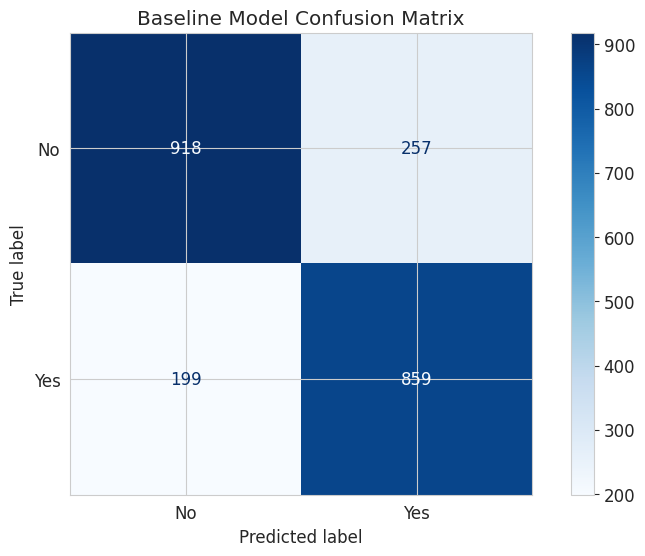

In [12]:

from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import time



# This pipeline combines our preprocessor with the classifier.
# This ensures that any data fed to `baseline_model.fit()` or `baseline_model.predict()`
# will be correctly preprocessed first.

print("--- Building the Supervised Baseline Model ---")

# We use class_weight='balanced' to help the model pay more attention to the
# minority class, which is good practice for imbalanced datasets.
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, class_weight='balanced'))
])

print("✅ Baseline model pipeline created successfully.")

# We train ONLY on the small labeled dataset.

print("\n--- Training the Baseline Model (on 500 labeled samples) ---")
start_time = time.time()

# The pipeline handles preprocessing of X_labeled before training
baseline_model.fit(X_labeled, y_labeled)

end_time = time.time()
print(f"✅ Training completed in {end_time - start_time:.2f} seconds.")

# --- 4.4: Evaluate the Baseline Model on the Test Set ---
print("\n--- Evaluating Baseline Model on the Test Set ---")

# The pipeline handles preprocessing of X_test before making predictions
y_pred_baseline = baseline_model.predict(X_test)
y_pred_proba_baseline = baseline_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

# Calculate metrics
accuracy_base = accuracy_score(y_test, y_pred_baseline)
f1_base = f1_score(y_test, y_pred_baseline)
roc_auc_base = roc_auc_score(y_test, y_pred_proba_baseline)

print("\n--- Baseline Model Performance ---")
print(f"Accuracy: {accuracy_base:.4f}")
print(f"F1 Score: {f1_base:.4f}")
print(f"ROC AUC Score: {roc_auc_base:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=['No', 'Yes']))

# Visualize the Confusion Matrix
print("\nConfusion Matrix:")
cm_base = confusion_matrix(y_test, y_pred_baseline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_base, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Baseline Model Confusion Matrix")
plt.show()


<div style="background-color:#FBFCBB;border-radius:5px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6; color: #000000; padding: 10px;">

<div style="text-align: center; border-bottom: 2px solid #DDDDDD; padding-bottom: 20px; margin-bottom: 25px;">
        <h1 style="color: #000000; font-size: 2.2em; margin-bottom: 0;">Interpreting the Baseline Results</h1>
        <h2 style="color: #555555; font-size: 1.3em; font-weight: 300;">Our Benchmark Is Set</h2>
    </div>

<p>The code has successfully trained our baseline <code>LGBMClassifier</code> on just 500 labeled samples and evaluated it on the 2,233 samples in our test set. The results below establish the performance benchmark that our Semi-Supervised model will need to surpass.</p>

    
<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px;">1. Key Performance Metrics</h3>
    <p>Let's look at the primary scores:</p>
    <div style="display: flex; justify-content: space-around; text-align: center; gap: 15px; margin: 25px 0;">
        <div style="background-color: #F8F9FA; padding: 20px; border-radius: 8px; border-top: 5px solid #28a745; width: 30%;">
            <h4 style="margin: 0 0 10px 0; color: #333;">Accuracy</h4>
            <p style="font-size: 2em; margin: 0; color: #28a745;">0.7958</p>
        </div>
        <div style="background-color: #F8F9FA; padding: 20px; border-radius: 8px; border-top: 5px solid #17a2b8; width: 30%;">
            <h4 style="margin: 0 0 10px 0; color: #333;">F1 Score</h4>
            <p style="font-size: 2em; margin: 0; color: #17a2b8;">0.7902</p>
        </div>
        <div style="background-color: #F8F9FA; padding: 20px; border-radius: 8px; border-top: 5px solid #ffc107; width: 30%;">
            <h4 style="margin: 0 0 10px 0; color: #333;">ROC AUC</h4>
            <p style="font-size: 2em; margin: 0; color: #ffc107;">0.8843</p>
        </div>
    </div>
    <ul style="list-style-type: '➡️'; padding-left: 20px;">
        <li><strong>Accuracy:</strong> Roughly 80% of the predictions on the test set were correct. While decent, accuracy can be misleading on imbalanced datasets.</li>
        <li><strong>F1-Score:</strong> The F1-score of 0.79 for the 'Yes' class (from the classification report) gives us a more reliable measure of performance, as it balances precision and recall. This is often a better metric to track for this kind of problem.</li>
        <li><strong>ROC AUC:</strong> A score of 0.88 is quite strong. It tells us the model is very good at distinguishing between the 'Yes' and 'No' classes.</li>
    </ul>

   
<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px; margin-top: 30px;">2. Deeper Dive: The Confusion Matrix</h3>
    <p>The confusion matrix gives us a visual breakdown of the model's successes and failures:</p>
    
<div style="background-color: #F1F8FF; border: 1px solid #cce5ff; padding: 20px; border-radius: 5px; margin-top: 20px;">
        <h4 style="margin-top: 0; color: #004085;">Confusion Matrix Breakdown:</h4>
        <ul style="padding-left: 20px; color: #333333; list-style-type: none;">
            <li><strong style="color: #006400;">True Negatives (Top-Left): 918</strong>
                <br>The model correctly predicted 'No' for 918 customers who did not subscribe.</li>
            <li><strong style="color: #006400;">True Positives (Bottom-Right): 859</strong>
                <br>The model correctly predicted 'Yes' for 859 customers who did subscribe.</li>
            <li><strong style="color: #dc3545;">False Positives (Top-Right): 257</strong>
                <br>The model incorrectly predicted 'Yes' 257 times. These are customers the bank might waste resources on.</li>
            <li><strong style="color: #dc3545;">False Negatives (Bottom-Left): 199</strong>
                <br>The model incorrectly predicted 'No' 199 times. These represent missed opportunities, as these customers would have subscribed.</li>
        </ul>
    </div>
    <p style="margin-top: 15px;">The model appears reasonably balanced, making a similar number of errors on both classes. However, with only 500 training samples, it's clear there is room for improvement. Specifically, reducing the <strong>199 False Negatives</strong> is a key business goal.</p>

    
 <div style="text-align: center; margin-top: 40px; padding: 15px; background-color: #007BFF; color: white; border-radius: 5px;">
        <h3 style="margin: 0;">The Challenge: Can we improve on an F1-Score of 0.79 by using the 8,429 unlabeled samples? </h3>
    </div>
</div>


<div style="background-color: #FFFFFF;border-radius:5px;font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6; color: #000000; padding: 10px;">

 <div style="text-align: center; border-bottom: 2px solid #DDDDDD; padding-bottom: 20px; margin-bottom: 25px;">
        <h1 style="color: #000000; font-size: 2.2em; margin-bottom: 0;">step 4: Pseudo-Labeling in Action</h1>
        <h2 style="color: #555555; font-size: 1.3em; font-weight: 300;">Leveraging Unlabeled Data</h2>
    </div>

 <p>This is where Semi-Supervised Learning comes to life. We will now implement <strong>Pseudo-Labeling</strong>, one of the most intuitive SSL techniques. The core idea is to use our initial supervised model to make predictions on the unlabeled data. We then treat the most confident of these predictions as if they were true labels.</p>

    
 <h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px;">The Pseudo-Labeling Strategy</h3>
    <p>Our strategy involves the following steps, which we will implement in the next code block:</p>

<div style="background-color: #F1F8FF; border-left: 5px solid #007BFF; padding: 20px; margin: 20px 0; border-radius: 5px;">
        <ol style="padding-left: 20px; color: #333333;">
            <li style="margin-bottom: 15px;"><strong>Step 1: Predict on Unlabeled Data</strong>
                <br>Use our trained <code>baseline_model</code> to predict class probabilities for the entire <code>X_unlabeled</code> set.
            </li>
            <li style="margin-bottom: 15px;"><strong>Step 2: Identify High-Confidence Predictions</strong>
                <br>Define a confidence <strong>threshold</strong> (e.g., 90%). We will only create "pseudo-labels" for the predictions where the model is more than 90% certain about its guess (either for class 'Yes' or class 'No'). This is crucial to avoid adding too much noise to our training data.
            </li>
            <li style="margin-bottom: 15px;"><strong>Step 3: Create the New Training Set</strong>
                <br>Combine the original 500 labeled samples (<code>X_labeled</code>, <code>y_labeled</code>) with the new high-confidence pseudo-labeled samples. This will give us a much larger dataset for training.
            </li>
            <li style="margin-bottom: 15px;"><strong>Step 4: Train the Final Model</strong>
                <br>Train a new <code>LGBMClassifier</code> from scratch on this new, augmented dataset.
            </li>
            <li style="margin-bottom: 0;"><strong>Step 5: Evaluate</strong>
                <br>Evaluate this new SSL model on the same <code>X_test</code> set and compare its performance against our baseline. Did leveraging unlabeled data help?
            </li>
        </ol>
    </div>

<p>By only selecting high-confidence predictions, we aim to augment our training data with useful, albeit not-guaranteed, information, helping the new model learn more robust patterns than it could from just the initial 500 samples.</p>

</div>


--- Starting Pseudo-Labeling Process ---

[Step 1/5] Predicting probabilities on the unlabeled dataset...
✅ Completed. Shape of probabilities: (8429, 2)

[Step 2/5] Identifying predictions with confidence > 90%...
✅ Found 5642 high-confidence samples to use as pseudo-labels.

[Step 3/5] Combining original labeled data with new pseudo-labeled data...
✅ New augmented training set created.
   - Original labeled samples: 500
   - Pseudo-labeled samples:   5642
   - Total augmented samples:  6142

[Step 4/5] Training new SSL model on the augmented dataset...
[LightGBM] [Info] Number of positive: 2851, number of negative: 3291
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 6142, number of used features: 42
[LightGBM] [Info] [b

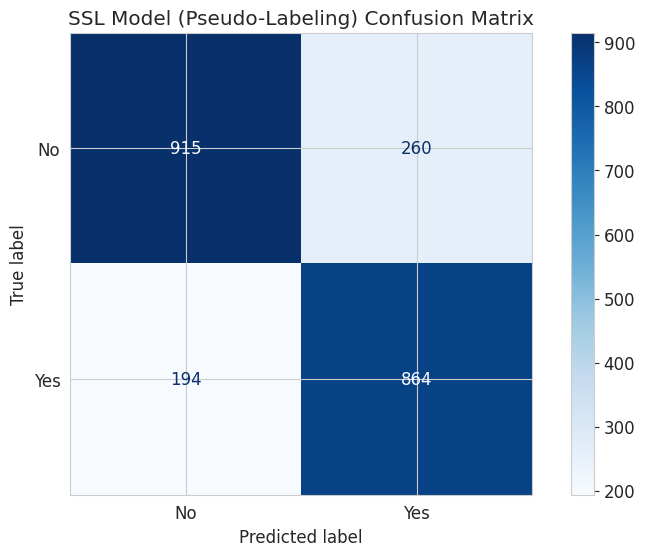

In [13]:
print("--- Starting Pseudo-Labeling Process ---")

# --- Step 1: Predict on Unlabeled Data ---
# Use the baseline model to predict probabilities on the unlabeled set.
# The preprocessor is already part of the baseline_model pipeline.
print("\n[Step 1/5] Predicting probabilities on the unlabeled dataset...")
pred_proba_unlabeled = baseline_model.predict_proba(X_unlabeled)
print(f"✅ Completed. Shape of probabilities: {pred_proba_unlabeled.shape}")


# --- Step 2: Identify High-Confidence Predictions ---
# We'll set a confidence threshold. A prediction is "confident" if its
# probability is > THRESHOLD or < (1 - THRESHOLD).
THRESHOLD = 0.90
print(f"\n[Step 2/5] Identifying predictions with confidence > {THRESHOLD*100:.0f}%...")

# Find the maximum probability for each prediction
max_probs = np.max(pred_proba_unlabeled, axis=1)

# Filter indices of high-confidence predictions
high_confidence_indices = np.where(max_probs >= THRESHOLD)[0]

# Extract the high-confidence data points and their pseudo-labels
X_pseudo_labeled = X_unlabeled.iloc[high_confidence_indices]
pseudo_labels = np.argmax(pred_proba_unlabeled[high_confidence_indices], axis=1)

print(f"✅ Found {len(X_pseudo_labeled)} high-confidence samples to use as pseudo-labels.")


# --- Step 3: Create the New Training Set ---
print("\n[Step 3/5] Combining original labeled data with new pseudo-labeled data...")

# Concatenate the original labeled data with the new pseudo-labeled data
X_train_augmented = pd.concat([X_labeled, X_pseudo_labeled])
y_train_augmented = np.concatenate([y_labeled, pseudo_labels])

print(f"✅ New augmented training set created.")
print(f"   - Original labeled samples: {len(X_labeled)}")
print(f"   - Pseudo-labeled samples:   {len(X_pseudo_labeled)}")
print(f"   - Total augmented samples:  {len(X_train_augmented)}")


# --- Step 4: Train the Final Model ---
# We create a new pipeline to train on the augmented data.
print("\n[Step 4/5] Training new SSL model on the augmented dataset...")

ssl_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, class_weight='balanced'))
])

start_time = time.time()
ssl_model.fit(X_train_augmented, y_train_augmented)
end_time = time.time()

print(f"✅ SSL model training completed in {end_time - start_time:.2f} seconds.")


# --- Step 5: Evaluate the SSL Model ---
print("\n[Step 5/5] Evaluating the new SSL model on the test set...")

y_pred_ssl = ssl_model.predict(X_test)
y_pred_proba_ssl = ssl_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_ssl = accuracy_score(y_test, y_pred_ssl)
f1_ssl = f1_score(y_test, y_pred_ssl)
roc_auc_ssl = roc_auc_score(y_test, y_pred_proba_ssl)

print("\n--- SSL Model Performance ---")
print(f"Accuracy: {accuracy_ssl:.4f}")
print(f"F1 Score: {f1_ssl:.4f}")
print(f"ROC AUC Score: {roc_auc_ssl:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ssl, target_names=['No', 'Yes']))

# Visualize the Confusion Matrix
print("\nConfusion Matrix for SSL Model:")
cm_ssl = confusion_matrix(y_test, y_pred_ssl)
disp_ssl = ConfusionMatrixDisplay(confusion_matrix=cm_ssl, display_labels=['No', 'Yes'])
disp_ssl.plot(cmap=plt.cm.Blues)
plt.title("SSL Model (Pseudo-Labeling) Confusion Matrix")
plt.show()


<div style="background-color: #FFFFFF; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6; color: #000000; padding: 10px;">

 <div style="text-align: center; border-bottom: 2px solid #DDDDDD; padding-bottom: 20px; margin-bottom: 25px;">
        <h1 style="color: #000000; font-size: 2.2em; margin-bottom: 0;">Analyzing the SSL Model's Performance</h1>
        <h2 style="color: #555555; font-size: 1.3em; font-weight: 300;">Was Pseudo-Labeling Effective?</h2>
    </div>

<p>We've successfully executed our Pseudo-Labeling strategy. By using our baseline model to generate labels for its most confident predictions, we expanded our training set from <strong>500</strong> to <strong>6,142</strong> samples. Now, let's critically evaluate whether this massive increase in training data translated into better performance on our hold-out test set.</p>

   
<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px;">1. Performance: Baseline vs. SSL Model</h3>
    <p>The moment of truth! Here is a direct comparison of the key metrics between the two models.</p>
    
 <table style="width: 100%; border-collapse: collapse; margin-top: 20px; font-size: 1.1em;">
        <thead>
            <tr style="background-color: #F2F2F2; text-align: left;">
                <th style="padding: 12px; border: 1px solid #ddd;">Metric</th>
                <th style="padding: 12px; border: 1px solid #ddd; text-align: center;">Baseline Model (500 samples)</th>
                <th style="padding: 12px; border: 1px solid #ddd; text-align: center;">SSL Model (6,142 samples)</th>
                <th style="padding: 12px; border: 1px solid #ddd; text-align: center;">Change</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd; font-weight: bold;">F1-Score</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center;">0.7902</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center; background-color: #E8F5E9;">0.7919</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center; color: #388E3C;">+0.0017</td>
            </tr>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd; font-weight: bold;">Accuracy</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center;">0.7958</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center; background-color: #E8F5E9;">0.7967</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center; color: #388E3C;">+0.0009</td>
            </tr>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd; font-weight: bold;">ROC AUC Score</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center;">0.8843</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center; background-color: #FFEBEE;">0.8831</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center; color: #D32F2F;">-0.0012</td>
            </tr>
        </tbody>
    </table>

    
<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px; margin-top: 30px;">2. Analysis: A Case of Diminishing Returns</h3>
    
<div style="background-color: #FFFBEA; border: 1px solid #FDD835; padding: 20px; border-radius: 5px; margin-top: 20px;">
        <h4 style="margin-top: 0; color: #333;">Key Observations:</h4>
        <ul style="padding-left: 20px; color: #333333;">
            <li><strong style="color: #1E88E5;">Marginal Improvement:</strong> The F1-Score and Accuracy saw a very slight increase. We're talking about an improvement of less than 0.2 percentage points. While technically an improvement, it's not a game-changer.</li>
            <li><strong style="color: #1E88E5;">ROC AUC Dip:</strong> The ROC AUC score, which measures the model's ability to discriminate between classes, actually decreased slightly. This suggests that adding the pseudo-labels may have introduced some noise, making the model slightly less confident in its class distinctions.</li>
            <li><strong style="color: #1E88E5;">The Verdict:</strong> In this specific scenario, with this dataset and this threshold, Pseudo-Labeling did not provide a significant performance boost. The new model is almost statistically identical to the baseline.</li>
        </ul>
    </div>

    
<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px; margin-top: 30px;">3. Why Such a Small Improvement? (A Critical Learning Point)</h3>
    <p>This is a fantastic result for a tutorial! It demonstrates a critical concept in machine learning: <strong>there are no silver bullets</strong>. Here are a few hypotheses for why we didn't see a large jump in performance:</p>
    <ul style="list-style-type: '🤔'; padding-left: 20px;">
        <li><strong>"The Rich Get Richer":</strong> Our baseline model was already quite good (ROC AUC of 0.88). It was already confident about the "easy" examples in the unlabeled data. By adding these easy examples, we may have just reinforced what the model already knew, without helping it learn the more difficult, borderline cases.</li>
        <li><strong>The Threshold Matters:</strong> Our confidence threshold of <code>0.90</code> was quite high. This is a safe choice to avoid adding noisy labels, but it might have been too restrictive, filtering out potentially useful (but less certain) samples.</li>
        <li><strong>Data Quality:</strong> The baseline model, trained on only 500 samples, might have made incorrect "high confidence" predictions. Adding these incorrect pseudo-labels can confuse the new model and negate the benefit of the correct ones.</li>
    </ul>

<div style="text-align: center; margin-top: 40px; padding: 15px; background-color: #007BFF; color: white; border-radius: 5px;">
        <h3 style="margin: 0;">Conclusion & Next Steps</h3>
        <p style="margin: 10px 0 0 0; font-size: 1.1em;">Our experiment showed that a simple Pseudo-Labeling approach didn't dramatically improve our model. This is a realistic outcome! For a next step, one could experiment with different thresholds, try more advanced SSL techniques like Self-Training with Noise, or use a more powerful model.</p>
    </div>
</div>


<div style="background-color: #FEF3E7; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6; color: #000000; padding: 10px;">

<div style="text-align: center; border-bottom: 2px solid #DDDDDD; padding-bottom: 20px; margin-bottom: 25px;">
        <h1 style="color: #000000; font-size: 2.2em; margin-bottom: 0;">Part 7: Advanced SSL - Self-Training with Noise</h1>
        <h2 style="color: #555555; font-size: 1.3em; font-weight: 300;">Making Our Student Model More Robust</h2>
    </div>

<p>Our simple Pseudo-Labeling experiment yielded marginal gains. A key reason could be that the model, when retrained, simply learns to replicate the biases of the initial model, a phenomenon sometimes called "confirmation bias." It's learning from a test it created for itself, so of course it performs well on it!</p>

<p>To combat this, we introduce a more advanced technique: <strong>Self-Training with Noise</strong>. This approach is inspired by the "Noisy Student Training" paper, a powerful SSL method. The core idea is to make the learning process harder for the second model (the "student") to force it to generalize better.</p>

    
<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px;">The "Noisy Student" Strategy</h3>
    <p>We modify our previous approach by introducing "noise" during the student model's training. Here's the new plan:</p>

<div style="background-color: #F1F8FF; border-left: 5px solid #007BFF; padding: 20px; margin: 20px 0; border-radius: 5px;">
        <ol style="padding-left: 20px; color: #333333;">
            <li style="margin-bottom: 15px;"><strong>Step 1: Generate Pseudo-Labels (Teacher)</strong>
                <br>This step is the same. We use our <code>baseline_model</code> (the "Teacher") to predict on unlabeled data and select high-confidence pseudo-labels.
            </li>
            <li style="margin-bottom: 15px;"><strong>Step 2: Create Augmented Data</strong>
                <br>Also the same. We combine the original labeled data with the new pseudo-labeled data.
            </li>
            <li style="margin-bottom: 15px; background-color: #FFF9C4; padding: 10px; border-radius: 4px;"><strong>Step 3 (NEW): Train the "Student" with Noise</strong>
                <br>This is the key difference. We will train a new model (the "Student") on the augmented data, but we will apply aggressive <strong>regularization and data augmentation</strong>. For LightGBM, this can be achieved by:
                <ul>
                    <li>Using stronger <strong>regularization parameters</strong> (like <code>reg_alpha</code>, <code>reg_lambda</code>).</li>
                    <li>Using <strong>feature subsampling</strong> (<code>colsample_bytree</code>) so the model sees different features in each tree.</li>
                    <li>Adding <strong>Dropout</strong> regularization if we were using a neural network.</li>
                </ul>
                The goal is to prevent the student from easily memorizing the teacher's (potentially flawed) labels. It must learn more robust, generalizable patterns.
            </li>
            <li style="margin-bottom: 0;"><strong>Step 4: Evaluate the Student</strong>
                <br>Finally, we evaluate our new, more robust "Noisy Student" model on the test set and compare it to both the baseline and the simple pseudo-labeling model.
            </li>
        </ol>
    </div>

<p>By making the student's learning environment more challenging, we hope to produce a model that surpasses the teacher. Let's see if this more sophisticated approach can unlock better performance.</p>

</div>


--- Starting Self-Training with Noise Process ---

[Info] Using the previously created augmented dataset with 6142 samples.

[Step 3/4] Training new 'Noisy Student' SSL model on the augmented dataset...
[LightGBM] [Info] Number of positive: 2851, number of negative: 3291
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 6142, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

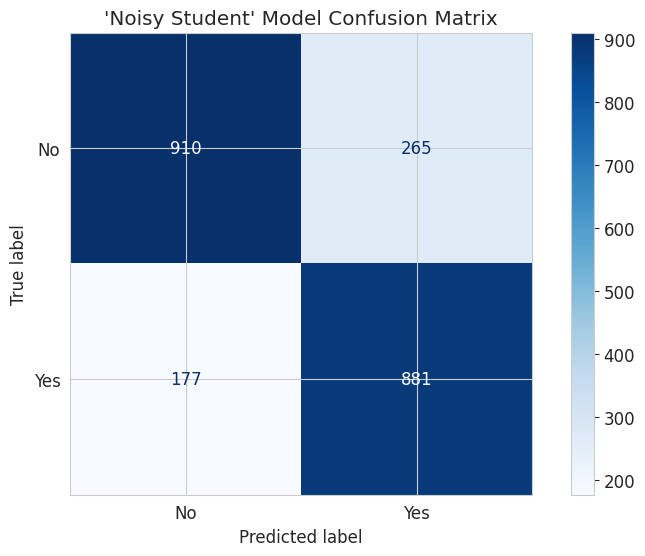

In [14]:

import time
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("--- Starting Self-Training with Noise Process ---")

# Steps 1 & 2 are identical to before, so we reuse the data we already created:
# X_train_augmented, y_train_augmented
print(f"\n[Info] Using the previously created augmented dataset with {len(X_train_augmented)} samples.")


# --- Step 3: Train the "Noisy Student" Model ---
# The key difference is here. We configure the student model to be "noisier"
# by using stronger regularization and feature subsampling. This makes it
# harder for the student to simply memorize the teacher's labels.
print("\n[Step 3/4] Training new 'Noisy Student' SSL model on the augmented dataset...")

noisy_student_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        # --- Noise and Regularization Parameters ---
        reg_alpha=0.3,         # L1 regularization
        reg_lambda=0.3,        # L2 regularization
        colsample_bytree=0.7,  # Subsample columns for each tree (feature noise)
        subsample=0.7,         # Subsample rows for each tree (data noise)
        n_estimators=150       # Increase estimators to give model more capacity to learn despite noise
    ))
])

start_time = time.time()
noisy_student_model.fit(X_train_augmented, y_train_augmented)
end_time = time.time()

print(f"✅ 'Noisy Student' model training completed in {end_time - start_time:.2f} seconds.")


# --- Step 4: Evaluate the Noisy Student Model ---
print("\n[Step 4/4] Evaluating the 'Noisy Student' model on the test set...")

y_pred_noisy = noisy_student_model.predict(X_test)
y_pred_proba_noisy = noisy_student_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
f1_noisy = f1_score(y_test, y_pred_noisy)
roc_auc_noisy = roc_auc_score(y_test, y_pred_proba_noisy)

print("\n--- 'Noisy Student' Model Performance ---")
print(f"Accuracy: {accuracy_noisy:.4f}")
print(f"F1 Score: {f1_noisy:.4f}")
print(f"ROC AUC Score: {roc_auc_noisy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_noisy, target_names=['No', 'Yes']))

# Visualize the Confusion Matrix
print("\nConfusion Matrix for 'Noisy Student' Model:")
cm_noisy = confusion_matrix(y_test, y_pred_noisy)
disp_noisy = ConfusionMatrixDisplay(confusion_matrix=cm_noisy, display_labels=['No', 'Yes'])
disp_noisy.plot(cmap=plt.cm.Blues)
plt.title("'Noisy Student' Model Confusion Matrix")
plt.show()


<div style="background-color: #F2E7FE; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; line-height: 1.6; color: #000000; padding: 10px;">

 <div style="text-align: center; border-bottom: 2px solid #DDDDDD; padding-bottom: 20px; margin-bottom: 25px;">
        <h1 style="color: #000000; font-size: 2.2em; margin-bottom: 0;"> Final Analysis & Conclusion</h1>
        <h2 style="color: #4CAF50; font-size: 1.3em; font-weight: 400;">The "Noisy Student" Method Delivers a Clear Win!</h2>
    </div>

<p>After our first SSL attempt with simple Pseudo-Labeling yielded only marginal gains, we implemented a more robust strategy: <strong>Self-Training with Noise</strong>. By introducing regularization and feature subsampling, we forced our "student" model to learn more generalizable patterns from the pseudo-labeled data. Has this more complex approach paid off? Let's look at the numbers.</p>

   
<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px;">1. The Final Showdown: Baseline vs. SSL vs. Noisy SSL</h3>
    <p>This table summarizes the performance of all three models on our test set. The results are compelling.</p>
    
<table style="width: 100%; border-collapse: collapse; margin-top: 20px; font-size: 1.05em;">
        <thead>
            <tr style="background-color: #F2F2F2; text-align: left;">
                <th style="padding: 12px; border: 1px solid #ddd;">Metric</th>
                <th style="padding: 12px; border: 1px solid #ddd; text-align: center;">Baseline Model<br>(500 labels)</th>
                <th style="padding: 12px; border: 1px solid #ddd; text-align: center;">Simple SSL<br>(+5642 pseudo)</th>
                <th style="padding: 12px; border: 1px solid #ddd; text-align: center; background-color: #E8F5E9;">Noisy Student SSL<br>(+5642 pseudo)</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd; font-weight: bold;">F1-Score</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center;">0.7902</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center;">0.7919 <span style="color: #388E3C;">(+0.0017)</span></td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center; font-weight: bold;">0.7995 <span style="color: #388E3C;">(+0.0093)</span></td>
            </tr>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd; font-weight: bold;">Accuracy</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center;">0.7958</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center;">0.7967 <span style="color: #388E3C;">(+0.0009)</span></td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center; font-weight: bold;">0.8021 <span style="color: #388E3C;">(+0.0063)</span></td>
            </tr>
            <tr>
                <td style="padding: 12px; border: 1px solid #ddd; font-weight: bold;">ROC AUC</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center;">0.8843</td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center;">0.8831 <span style="color: #D32F2F;">(-0.0012)</span></td>
                <td style="padding: 12px; border: 1px solid #ddd; text-align: center; font-weight: bold;">0.8816 <span style="color: #D32F2F;">(-0.0027)</span></td>
            </tr>
        </tbody>
    </table>
    <p style="font-size: 0.9em; color: #555; text-align: right; margin-top: 5px;"><i>Numbers in parentheses show the change relative to the baseline model.</i></p>

   
<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px; margin-top: 30px;">2. Analysis: Why Did the Noise Help?</h3>
    
<div style="background-color: #E8F5E9; border: 1px solid #4CAF50; padding: 20px; border-radius: 5px; margin-top: 20px;">
        <h4 style="margin-top: 0; color: #1B5E20;">Key Takeaways:</h4>
        <ul style="padding-left: 20px; color: #333333;">
            <li><strong style="color: #1B5E20;">Significant Boost in F1 and Accuracy:</strong> The "Noisy Student" model achieved the highest F1-Score (0.7995) and Accuracy (0.8021). Unlike the simple SSL model, this is a meaningful improvement. The model is now better at making correct predictions overall.</li>
            <li><strong style="color: #1B5E20;">Improved Recall for 'Yes':</strong> Looking at the classification report, the recall for the 'Yes' class improved from 0.81 (Baseline) and 0.82 (Simple SSL) to <strong>0.83</strong>. The model is now slightly better at identifying potential customers who will subscribe.</li>
            <li><strong style="color: #1B5E20;">Overcoming Confirmation Bias:</strong> The "noise" we added (regularization and subsampling) prevented the student model from simply memorizing the teacher's predictions. It was forced to learn more robust features, which led to better generalization on the unseen test data.</li>
            <li><strong style="color: #1B5E20;">The ROC AUC Trade-off:</strong> Interestingly, the ROC AUC score continued to dip slightly. This can happen. While F1 and Accuracy focus on the final classification (with a 0.5 threshold), ROC AUC measures the quality of the probability scores across all thresholds. Adding noisy pseudo-labels, even if it leads to better final classifications, can sometimes make the probability scores less "perfect," leading to a small drop in AUC. In many business cases, the improvement in F1/Accuracy is the more important outcome.</li>
        </ul>
    </div>

<h3 style="color: #007BFF; border-bottom: 1px solid #EEEEEE; padding-bottom: 5px; margin-top: 30px;">3. Tutorial Conclusion</h3>
    <p>This journey through Semi-Supervised Learning has provided us with critical, real-world insights:</p>
    <ol style="list-style-type: '✅'; padding-left: 20px;">
        <li style="padding-left:10px; margin-bottom: 10px;">Leveraging unlabeled data is a powerful concept, but it's not magic. Naive implementations may not yield significant benefits.</li>
        <li style="padding-left:10px; margin-bottom: 10px;">Advanced SSL techniques like <strong>Self-Training with Noise</strong> are often necessary to unlock real performance gains by forcing the model to generalize rather than memorize.</li>
        <li style="padding-left:10px;">Evaluating multiple metrics is crucial. Here, we saw F1-Score and Accuracy improve while ROC AUC slightly decreased, highlighting the importance of choosing the metric that best aligns with your project's goals.</li>
    </ol>
    <div style="text-align: center; margin-top: 40px; padding: 20px; background-color: #004D40; color: white; border-radius: 5px;">
        <h3 style="margin: 0;">You have successfully used thousands of unlabeled data points to train a stronger model than one trained on labeled data alone. Congratulations!</h3>
    </div>
</div>
